# Validate the change in TurnID

In [12]:
%run ../visualizations.ipynb
%load_ext memory_profiler
sys.path.insert(0, '../modules')

import sys
from hits import CDCHits, CTHHits, CDCHits, FlatHits
from memory_profiler import memory_usage
from pprint import pprint
from collections import Counter
from root_numpy import list_branches
from tracking import HoughSpace
from scipy import sparse
from tracking import HoughTransformer, HoughShifter
from cylinder import CDC
import root_numpy

Populating the interactive namespace from numpy and matplotlib
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [15]:
file_base = "/home/elg112/ICEDUST_old/track_finding_standalone/"\
            "track_finding_yandex/data/"

In [92]:
signal_file = ["oa_xx_xxx_09000000-0000_fovwyt4lsr72_user-TrkTree_000_700signal-label.root"]
signal_file_merged = ["oa_xx_xxx_09000000-0000_vu5bnhfg3rgk_user-TrkTree_000_700signal.root ",
                      "oa_xx_xxx_09100000-0000_opgjz6dop7ho_user-TrkTree_000_signal-label.root",
                      "with_smear.root",
                      "no_smear.root"]
signal_file_merged = [ file_base + file_name for file_name in signal_file_merged]

In [87]:
pprint(root_numpy.list_branches(signal_file_merged[0],
                                treename="CDCHitTree"))

['CDCHit.fDriftDist',
 'CDCHit.fDriftTime',
 'CDCHit.fDetectedTime',
 'CDCHit.fTurnID',
 'CDCHit.fMCMom.fX',
 'CDCHit.fMCMom.fY',
 'CDCHit.fMCMom.fZ',
 'CDCHit.fTrack.fTrackID',
 'CDCHit.fTrack.fParentTrackID',
 'CDCHit.fTrack.fPID',
 'CDCHit.fTrack.fTags.fTagMaskPersisted',
 'CDCHit.fTrack.fTagsAsParent.fTagMaskPersisted',
 'CDCHit.fTrack.fTagsAsDaughter.fTagMaskPersisted',
 'CDCHit.fTrack.fStartMomentum.fX',
 'CDCHit.fTrack.fStartMomentum.fY',
 'CDCHit.fTrack.fStartMomentum.fZ',
 'CDCHit.fTrack.fStopMomentum.fX',
 'CDCHit.fTrack.fStopMomentum.fY',
 'CDCHit.fTrack.fStopMomentum.fZ',
 'CDCHit.fTrack.fStartPosGlobal.fP.fX',
 'CDCHit.fTrack.fStartPosGlobal.fP.fY',
 'CDCHit.fTrack.fStartPosGlobal.fP.fZ',
 'CDCHit.fTrack.fStartPosGlobal.fE',
 'CDCHit.fTrack.fStopPosGlobal.fP.fX',
 'CDCHit.fTrack.fStopPosGlobal.fP.fY',
 'CDCHit.fTrack.fStopPosGlobal.fP.fZ',
 'CDCHit.fTrack.fStopPosGlobal.fE',
 'CDCHit.fMCPos.fP.fX',
 'CDCHit.fMCPos.fP.fY',
 'CDCHit.fMCPos.fP.fZ',
 'CDCHit.fMCPos.fE',
 'CDCH

In [88]:
merged_signal = root_numpy.root2array(signal_file_merged[0],
                                      treename="CDCHitTree")

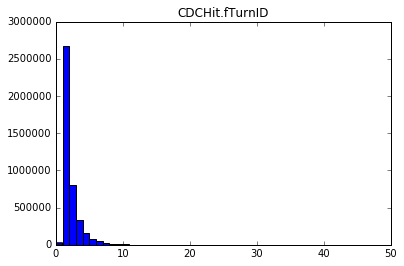

59.057056427 199.999816895


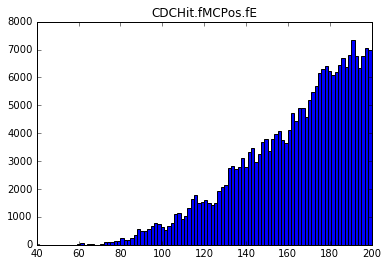

In [89]:
# CDC Turn ID
branch_name = 'CDCHit.fTurnID'
to_plot = merged_signal[branch_name]
n_bins = np.amax(to_plot) - np.amin(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=n_bins)
plt.show()
# CDC Time of hit
branch_name = 'CDCHit.fMCPos.fE'
to_plot = merged_signal[branch_name][merged_signal[branch_name] < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()

In [91]:
merged_signal = root_numpy.root2array(signal_file_merged[1],
                                      treename="CDCHitTree")

IOError: unable to access tree 'CDCHitTree' in /home/elg112/ICEDUST_old/track_finding_standalone/track_finding_yandex/data/oa_xx_xxx_09100000-0000_opgjz6dop7ho_user-TrkTree_000_signal-label.rootwith_smear.root

In [ ]:
# CDC Turn ID
branch_name = 'CDCHit.fTurnID'
to_plot = merged_signal[branch_name]
n_bins = np.amax(to_plot) - np.amin(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=n_bins)
plt.show()
# CDC Time of hit with smear
branch_name = 'CDCHit.fMCPos.fE' 
to_plot = merged_signal[branch_name] + merged_signal['CDCHit.fSmearTime']
to_plot = to_plot[to_plot < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()
# CDC Time of hit no smear
branch_name = 'CDCHit.fMCPos.fE' 
to_plot = merged_signal[branch_name]
to_plot = to_plot[to_plot < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()

In [93]:
merged_signal = root_numpy.root2array(signal_file_merged[2],
                                      treename="CDCHitTree")

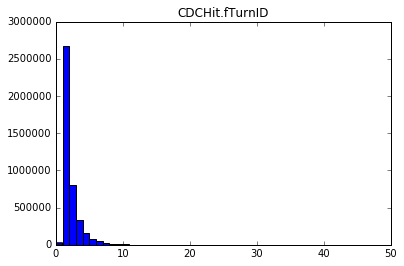

23.9051208496 199.999637842


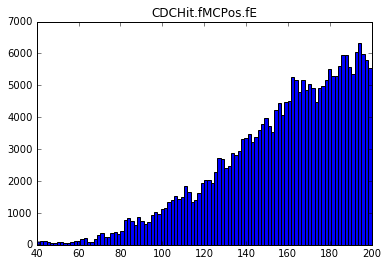

59.057056427 199.999816895


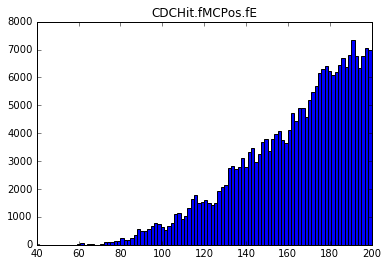

In [94]:
# CDC Turn ID
branch_name = 'CDCHit.fTurnID'
to_plot = merged_signal[branch_name]
n_bins = np.amax(to_plot) - np.amin(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=n_bins)
plt.show()
# CDC Time of hit with smear
branch_name = 'CDCHit.fMCPos.fE' 
to_plot = merged_signal[branch_name] + merged_signal['CDCHit.fSmearTime']
to_plot = to_plot[to_plot < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()
# CDC Time of hit no smear
branch_name = 'CDCHit.fMCPos.fE' 
to_plot = merged_signal[branch_name]
to_plot = to_plot[to_plot < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()

In [95]:
merged_signal = root_numpy.root2array(signal_file_merged[3],
                                      treename="CDCHitTree")

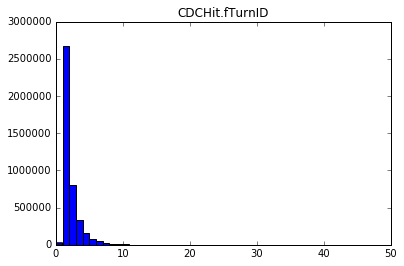

59.057056427 199.999816895


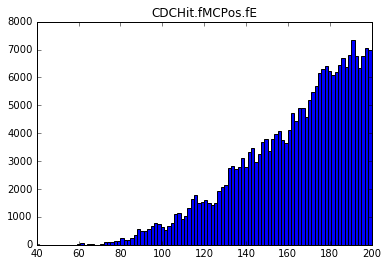

59.057056427 199.999816895


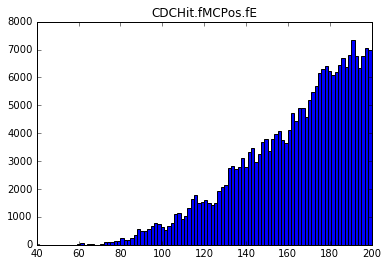

In [97]:
# CDC Turn ID
branch_name = 'CDCHit.fTurnID'
to_plot = merged_signal[branch_name]
n_bins = np.amax(to_plot) - np.amin(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=n_bins)
plt.show()
# CDC Time of hit with smear
branch_name = 'CDCHit.fMCPos.fE' 
to_plot = merged_signal[branch_name]
to_plot = to_plot[to_plot < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()
# CDC Time of hit no smear
branch_name = 'CDCHit.fMCPos.fE' 
to_plot = merged_signal[branch_name]
to_plot = to_plot[to_plot < 200]
print np.amin(to_plot), np.amax(to_plot)
plt.title(branch_name)
plt.hist(to_plot, bins=100, range=(40,200))
plt.show()